# Data Augmentation with Imgaug


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import imgaug as ia
import imageio as io

In [4]:
%cd /content/gdrive/My Drive/img/edison/

/content/gdrive/My Drive/img/edison


## Loading Image

imgaug library does not have a funtion for read the image. Because of that we will use imageio library. If you want you can use OpenCv too. However imgaug supports RGB. If we read image with opencv, it returns BGR. For use image with imgaug we should conver BGR to RGB.

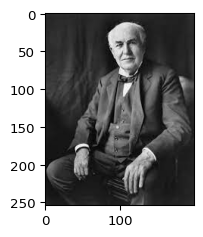

In [5]:
img = io.imread("edison.jpg")
ia.imshow(image=img)

## Augment the Image

In [6]:
from imgaug import augmenters as iaa

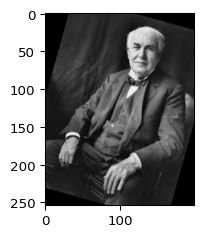

In [7]:
ia.seed(4) # ensures the same value rotation every time it runs

rotate = iaa.Affine(rotate=(-25,25)) # random degree between -25 to 25 
img_aug = rotate(image=img)

ia.imshow(img_aug)

## Augment a Batch of Images

In [8]:
import numpy as np

Mostly we work with more than one images. Imgaus support handling multiple images. First we should add images in a list. After that we can apply rotation process all images randomly. The np.hstack() function should be used for the display process.

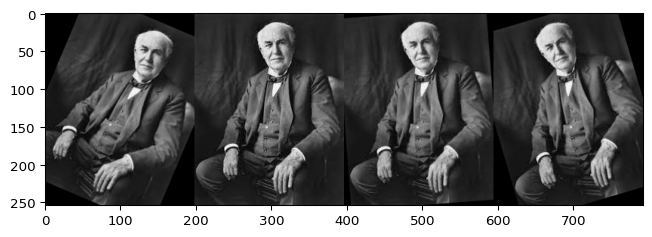

In [9]:
images = [img, img, img, img]
images_aug = rotate(images=images)

ia.imshow(np.hstack(images_aug))

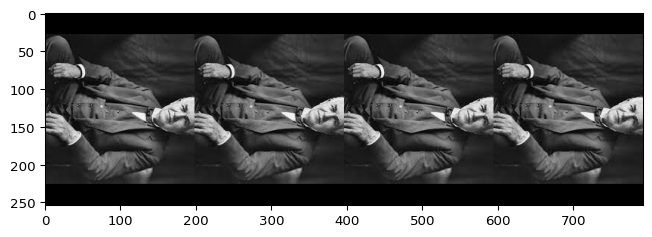

In [10]:
rotate = iaa.Affine(rotate=90)
images = [img, img, img, img]
images_aug = rotate(images=images)

ia.imshow(np.hstack(images_aug))

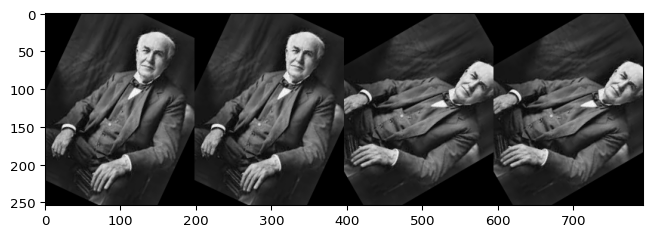

In [11]:
rotate = iaa.Affine(rotate=[25,60]) #rotate 25 or 60
images = [img, img, img, img]
images_aug = rotate(images=images)

ia.imshow(np.hstack(images_aug))

In the example above we used a list to combine our images to one batch. We could have also provided a single numpy array of shape (N, H, W, [C]), where N would have been the number of images, H their height, W their width and C (optionally) the channel-axis.

## Use Many Augmentation Techniques Simultaneously

Most of the time one augmentation technique is not enough. We can apply augmentation techniques simultaneously with the help of Sequential.

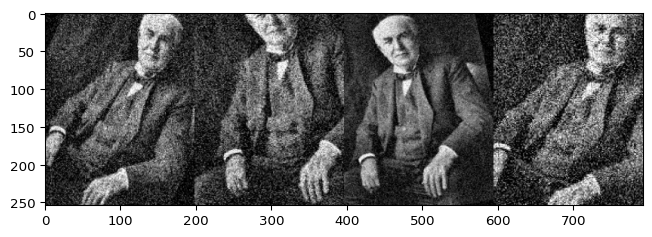

In [12]:
seq = iaa.Sequential([
                      iaa.Affine(rotate=(-20,30)),
                      iaa.AdditiveGaussianNoise(scale=(10,60)),
                      iaa.Crop(percent=(0, 0.2))
])

imgs_aug = seq(images=images)

ia.imshow(np.hstack(imgs_aug))

Some of images are zoomed this is Crop. Also all images have still same size.This is because Crop by default retains the input image size, i.e. after removing pixels it resizes the remaining image back to the input size. If you instead prefer to not resize back to the original image size, instantiate Crop as Crop(..., keep_size=False), where keep_size denotes "keep the image sizes constant between input and output".

Augmented:


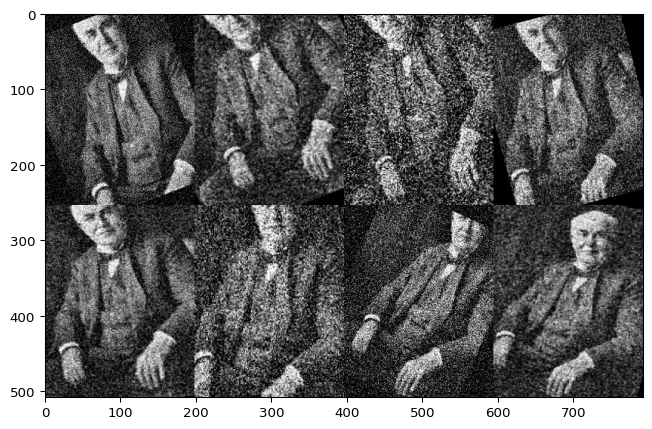

In [13]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(30, 90)),
    iaa.Crop(percent=(0, 0.2))
], random_order=True)

images_aug = [seq(image=img) for _ in range(8)]

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug, cols=4, rows=2))

random_order=True to Sequential. If activated, it applies augmentations in random order, greatly increasing the space of possible augmentations and saving us from having to implement that ourselves. we augment the input image eight times via a loop instead of using a single call augmentation call for the whole batch. That is because the random order is sampled once per batch and not per image in the batch. To see many different orders here, we therefore augment several times.

## Augmenting Images of Different Sizes

Imgaug support augmentation for different size of images. We do not need to reshape images.

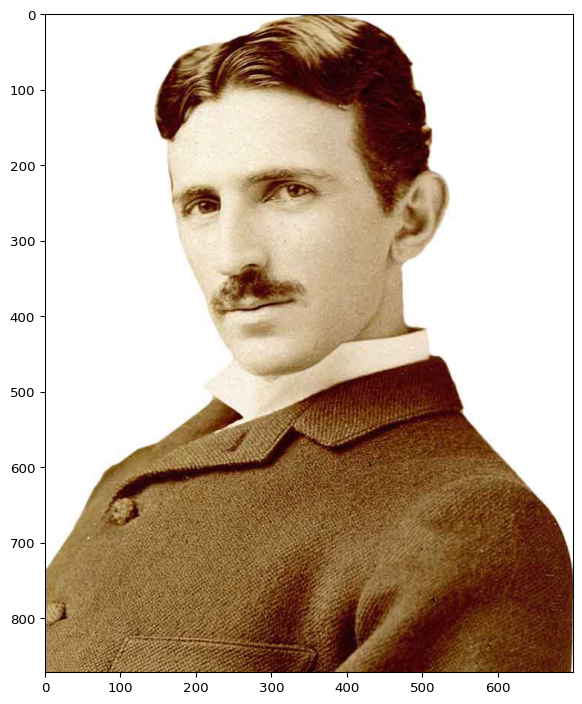

In [14]:
img2 = io.imread("/content/gdrive/My Drive/img/tesla/tesla.jpg")
ia.imshow(img2)

In [15]:
img2.shape

(872, 700, 3)

In [16]:
seq = iaa.Sequential([
    iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),  # crop and pad images
    iaa.AddToHueAndSaturation((-60, 60)),  # change their color
    iaa.ElasticTransformation(alpha=90, sigma=9) # water-like effect
], random_order=True)

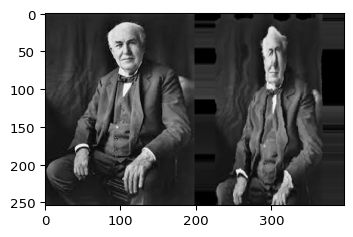

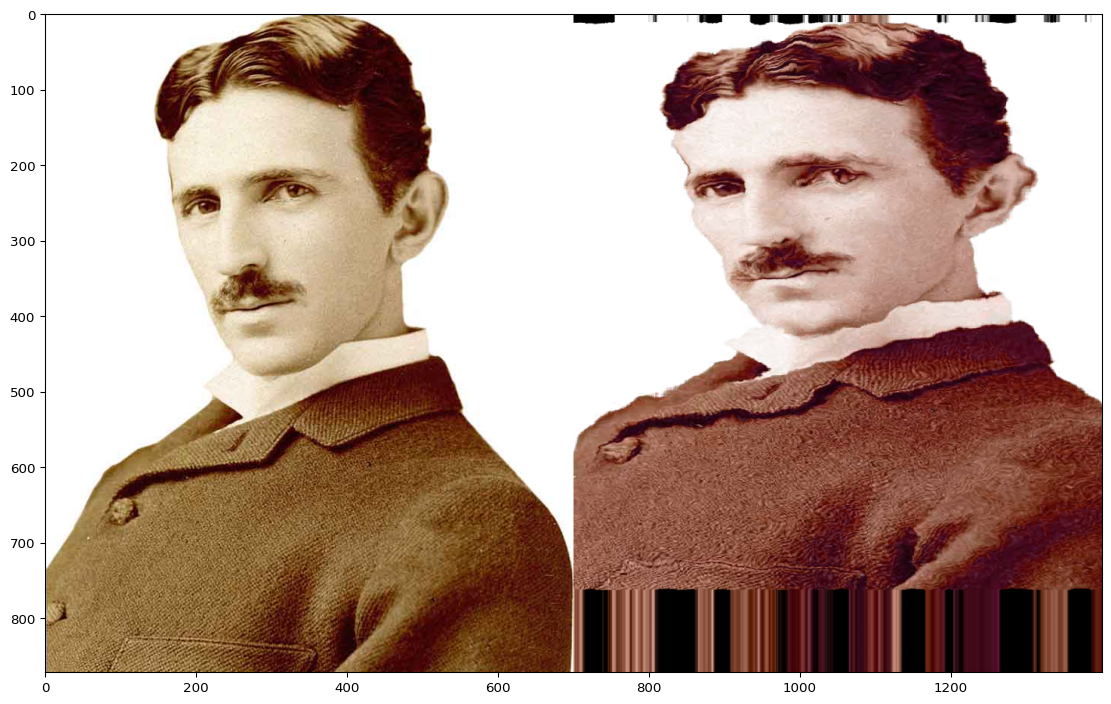

In [17]:
images = [img, img2]

images_aug = seq(images=images)
ia.imshow(np.hstack([images[0], images_aug[0]]))
ia.imshow(np.hstack([images[1], images_aug[1]]))